In [1]:
from impedance.models.circuits import CustomCircuit
from impedance.models.circuits.elements import element
import numpy as np
from impedance.visualization import plot_nyquist
import matplotlib.pyplot as plt

In [2]:
@element(num_params=2, units=["Ohm", "F"],overwrite=True)
def TLMuniNew(p, f):
   
    omega = 2 * np.pi * np.array(f)
    R1, Q = p[0], p[1]
    Z= 2*np.sqrt(R1/(omega*1j*Q))*(1/(np.tanh(np.sqrt(1j*omega*R1*Q))))
    return Z

In [3]:
tlmuni=CustomCircuit(initial_guess=[2000,1e-3],circuit='TLMuniNew_0')
tlmuni2=CustomCircuit(initial_guess=[1000,1e-4],circuit='TLMuniNew_0')

In [4]:
err_noise=0.1
f_pred = np.logspace(3,-1,num=100)
tlmuni_pred = tlmuni.predict(f_pred)
tlmuni_pred_noisy=np.random.normal(np.real(tlmuni_pred),np.abs(err_noise*np.real(tlmuni_pred)))+1j*np.random.normal(np.imag(tlmuni_pred),np.abs(err_noise*np.imag(tlmuni_pred)))

c:\Users\Gaming\AppData\Local\Programs\Python\Python311\Lib\site-packages\impedance\models\circuits\circuits.py:145: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")


(1.3, 1.5)

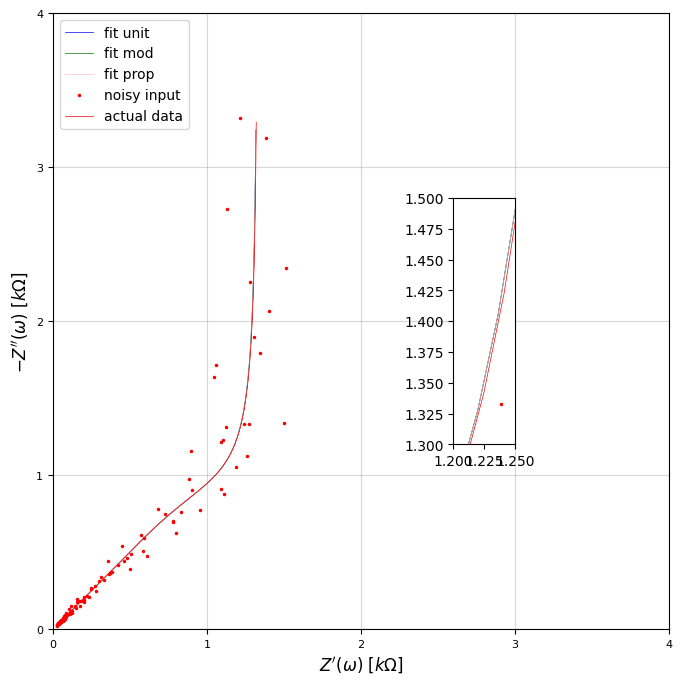

In [5]:
w_prop=np.concatenate((np.real(tlmuni_pred),np.imag(tlmuni_pred)))
w_mod=np.concatenate((np.abs(tlmuni_pred),np.abs(tlmuni_pred)))
fitted_prop=tlmuni2.fit(f_pred,tlmuni_pred_noisy,sigma=w_prop)
fitted_mod=tlmuni2.fit(f_pred,tlmuni_pred_noisy,sigma=w_mod)
fitted_unit=tlmuni2.fit(f_pred,tlmuni_pred_noisy)


z_fitted_prop=fitted_prop.predict(f_pred)
z_fitted_mod=fitted_mod.predict(f_pred)
z_fitted_unit=fitted_unit.predict(f_pred)
f, ax=plt.subplots()
f.set_size_inches(8,8)
factor=1000
plot_nyquist(z_fitted_unit/factor,ax=ax,label="fit unit",ms="3",fmt="-",color="blue",linewidth="0.5")
plot_nyquist(z_fitted_mod/factor,ax=ax,label="fit mod",ms="3",fmt="-",color="green",linewidth="0.5")
plot_nyquist(z_fitted_prop/factor,ax=ax,label="fit prop",ms="3",fmt="-",color="pink",linewidth="0.5")
plot_nyquist(tlmuni_pred_noisy/factor,ax=ax,fmt=".",label="noisy input",ms="3",color="red")
plot_nyquist(tlmuni_pred/factor,ax=ax,label="actual data",color="red",linewidth="0.5",ms="3",fmt="-")

units=r"k\Omega"
ax.set_xlabel(r'$Z^{\prime}(\omega)$ ' +'$[{}]$'.format(units), fontsize=12)
ax.set_ylabel(r'$-Z^{\prime\prime}(\omega)$ ' +'$[{}]$'.format(units), fontsize=12)
ax.legend(loc="upper left")
ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.tick_params(labelsize=8)

ax22=ax.inset_axes([0.5,0.3,0.4,0.4])
ax22.plot(np.real(z_fitted_unit/factor),-np.imag(z_fitted_unit/factor),label="fit unit",ms="3",color="blue",linewidth="0.5")
ax22.plot(np.real(z_fitted_mod/factor),-np.imag(z_fitted_mod/factor),label="fit mod",ms="3",color="green",linewidth="0.5")
ax22.plot(np.real(z_fitted_prop/factor),-np.imag(z_fitted_prop/factor),label="fit prop",ms="3",color="pink",linewidth="0.5")
ax22.plot(np.real(tlmuni_pred_noisy/factor),-np.imag(tlmuni_pred_noisy/factor),".",label="noisy input",ms="3",color="red")
ax22.plot(np.real(tlmuni_pred/factor),-np.imag(tlmuni_pred/factor),label="actual data",color="red",linewidth="0.5",ms="3")
ax22.set_aspect("equal")
ax22.set_xlim(1.2,1.25)
ax22.set_ylim(1.3,1.5)
ax22